# Data contains X-Ray images of patients in train and test form, So the task is to detect the X-Rays of covid patients as well non covid. 

In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np

In [3]:
import os
for dirname, _, filenames in os.walk(r'C:\Users\user\Dropbox\PC\Desktop\Deep Learning\CNN\covid-19 X-RAY detection CNN\covid-19 X-RAY detection CNN\xray_dataset_covid19'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\user\Dropbox\PC\Desktop\Deep Learning\CNN\covid-19 X-RAY detection CNN\covid-19 X-RAY detection CNN\xray_dataset_covid19\test\NORMAL\NORMAL2-IM-0035-0001.jpeg
C:\Users\user\Dropbox\PC\Desktop\Deep Learning\CNN\covid-19 X-RAY detection CNN\covid-19 X-RAY detection CNN\xray_dataset_covid19\test\NORMAL\NORMAL2-IM-0052-0001.jpeg
C:\Users\user\Dropbox\PC\Desktop\Deep Learning\CNN\covid-19 X-RAY detection CNN\covid-19 X-RAY detection CNN\xray_dataset_covid19\test\NORMAL\NORMAL2-IM-0058-0001.jpeg
C:\Users\user\Dropbox\PC\Desktop\Deep Learning\CNN\covid-19 X-RAY detection CNN\covid-19 X-RAY detection CNN\xray_dataset_covid19\test\NORMAL\NORMAL2-IM-0059-0001.jpeg
C:\Users\user\Dropbox\PC\Desktop\Deep Learning\CNN\covid-19 X-RAY detection CNN\covid-19 X-RAY detection CNN\xray_dataset_covid19\test\NORMAL\NORMAL2-IM-0072-0001.jpeg
C:\Users\user\Dropbox\PC\Desktop\Deep Learning\CNN\covid-19 X-RAY detection CNN\covid-19 X-RAY detection CNN\xray_dataset_covid19\test\NORMAL\NORMAL2-IM-0073-00

In [4]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [7]:
from tensorflow import keras

In [8]:
import tensorflow
import cv2 
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
from keras.preprocessing.image import ImageDataGenerator

# Preview Images

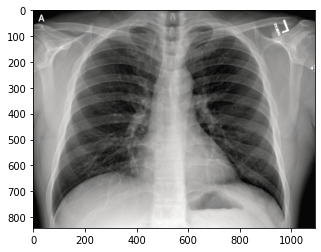

In [10]:
plt.imshow(cv2.imread(r"C:/Users/user/Dropbox/PC/Desktop/Deep Learning/CNN/covid-19 X-RAY detection CNN/covid-19 X-RAY detection CNN/xray_dataset_covid19/train/PNEUMONIA/nejmoa2001191_f1-PA.jpeg"))

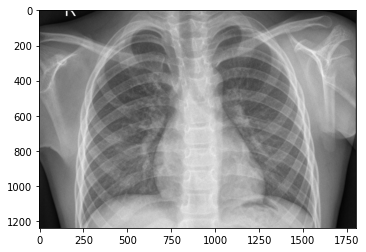

In [11]:
plt.imshow(cv2.imread(r"C:/Users/user/Dropbox/PC/Desktop/Deep Learning/CNN/covid-19 X-RAY detection CNN/covid-19 X-RAY detection CNN/xray_dataset_covid19/train/NORMAL/IM-0015-0001.jpeg"))

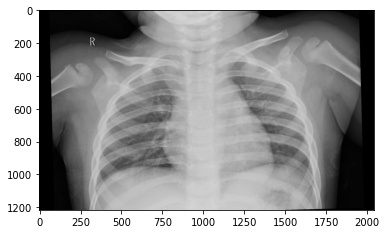

In [12]:
plt.imshow(cv2.imread(r"C:/Users/user/Dropbox/PC/Desktop/Deep Learning/CNN/covid-19 X-RAY detection CNN/covid-19 X-RAY detection CNN/xray_dataset_covid19/test/NORMAL/NORMAL2-IM-0123-0001.jpeg"))

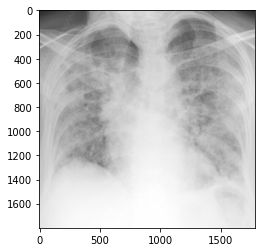

In [13]:
plt.imshow(cv2.imread(r"C:/Users/user/Dropbox/PC/Desktop/Deep Learning/CNN/covid-19 X-RAY detection CNN/covid-19 X-RAY detection CNN/xray_dataset_covid19/test/PNEUMONIA/SARS-10.1148rg.242035193-g04mr34g09c-Fig9c-day27.jpeg"))

# TRAINING DATASET

In [14]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory(r'C:/Users/user/Dropbox/PC/Desktop/Deep Learning/CNN/covid-19 X-RAY detection CNN/covid-19 X-RAY detection CNN/xray_dataset_covid19/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 148 images belonging to 2 classes.


In [15]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory(
    r"C:/Users/user/Dropbox/PC/Desktop/Deep Learning/CNN/covid-19 X-RAY detection CNN/covid-19 X-RAY detection CNN/xray_dataset_covid19/test", # same directory as training data
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary')

Found 40 images belonging to 2 classes.


In [16]:
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

# Modeling

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [18]:
pip install -U numpy 

Note: you may need to restart the kernel to use updated packages.


In [19]:
model = Sequential()
image_shape = (1000,1000,3)

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, remember its binary so we use sigmoid
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 998, 998, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 499, 499, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 497, 497, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 248, 248, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 246, 246, 64)      36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 123, 123, 64)      0         
_________________________________________________________________
flatten (Flatten)            (None, 968256)            0

In [21]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)
batch_size = 16

In [22]:
train_path=r'C:/Users/user/Dropbox/PC/Desktop/Deep Learning/CNN/covid-19 X-RAY detection CNN/covid-19 X-RAY detection CNN/xray_dataset_covid19/train'
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 148 images belonging to 2 classes.


In [23]:
test_path=r'C:/Users/user/Dropbox/PC/Desktop/Deep Learning/CNN/covid-19 X-RAY detection CNN/covid-19 X-RAY detection CNN/xray_dataset_covid19/test'
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False)

Found 40 images belonging to 2 classes.


In [24]:
results = model.fit(train_image_gen,epochs=10,
                              validation_data=test_image_gen,callbacks=[early_stop])

Epoch 1/10
10/10 [==============================] - 632s 62s/step - loss: 10.2264 - accuracy: 0.4662 - val_loss: 0.7073 - val_accuracy: 0.5000
Epoch 2/10
10/10 [==============================] - 702s 70s/step - loss: 0.6986 - accuracy: 0.5743 - val_loss: 0.3798 - val_accuracy: 1.0000
Epoch 3/10
10/10 [==============================] - 652s 66s/step - loss: 0.5796 - accuracy: 0.7432 - val_loss: 0.2714 - val_accuracy: 0.9750
Epoch 4/10
10/10 [==============================] - 669s 67s/step - loss: 0.3741 - accuracy: 0.8311 - val_loss: 0.2480 - val_accuracy: 0.8500
Epoch 5/10
10/10 [==============================] - 680s 68s/step - loss: 0.4471 - accuracy: 0.8311 - val_loss: 0.3792 - val_accuracy: 0.8500
Epoch 6/10
10/10 [==============================] - 652s 71s/step - loss: 0.4803 - accuracy: 0.8176 - val_loss: 0.3455 - val_accuracy: 0.8500


In [25]:
losses = pd.DataFrame(model.history.history)

In [26]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,10.226360,0.466216,0.707254,0.500
1,0.698563,0.574324,0.379824,1.000
2,0.579594,0.743243,0.271429,0.975
3,0.374060,0.831081,0.247955,0.850
4,0.447123,0.831081,0.379200,0.850


<AxesSubplot:>

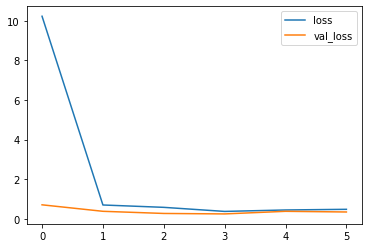

In [27]:
losses[['loss','val_loss']].plot()

<AxesSubplot:>

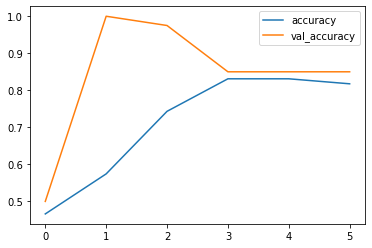

In [28]:
losses[['accuracy','val_accuracy']].plot()

<AxesSubplot:>

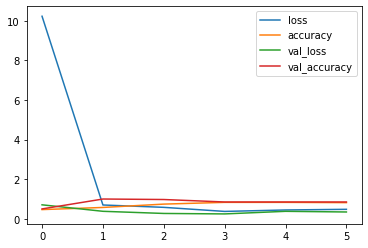

In [29]:
losses.plot()

In [30]:
model.evaluate(test_image_gen)

3/3 [==============================] - 17s 4s/step - loss: 0.2334 - accuracy: 0.9750


[0.23336906731128693, 0.9750000238418579]

# Prediction

In [31]:
pred_probabilities = model.predict_generator(test_image_gen)

C:\Users\user\anaconda3\envs\tf\lib\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [32]:
pred_probabilities

array([[6.6971779e-04],
       [5.6056780e-01],
       [4.0847063e-04],
       [2.4314463e-02],
       [2.2665581e-01],
       [5.8186054e-04],
       [2.6643276e-04],
       [1.3961151e-01],
       [4.9085200e-02],
       [2.8874588e-01],
       [9.2422664e-03],
       [3.2652915e-02],
       [5.8175737e-01],
       [1.7072320e-02],
       [2.6533008e-04],
       [3.5873055e-04],
       [2.6164353e-03],
       [5.9120655e-03],
       [1.6507006e-01],
       [2.1894008e-02],
       [5.6543165e-01],
       [6.5206945e-01],
       [5.2805007e-01],
       [6.9794577e-01],
       [5.9264612e-01],
       [5.1682985e-01],
       [5.5924743e-01],
       [6.2769246e-01],
       [5.6992257e-01],
       [5.1799273e-01],
       [5.0426424e-01],
       [8.4434831e-01],
       [9.8270744e-01],
       [7.6215017e-01],
       [3.5864675e-01],
       [2.1316189e-01],
       [9.2971683e-01],
       [9.7280324e-01],
       [9.3853390e-01],
       [9.7330821e-01]], dtype=float32)

In [33]:
test_image_gen.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [34]:
predictions = pred_probabilities > 0.5

In [35]:
predictions

array([[False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True]])

In [36]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        20
           1       0.90      0.90      0.90        20

    accuracy                           0.90        40
   macro avg       0.90      0.90      0.90        40
weighted avg       0.90      0.90      0.90        40



In [37]:
confusion_matrix(test_image_gen.classes,predictions)

array([[18,  2],
       [ 2, 18]], dtype=int64)

In [38]:
predict_path=r'C:/Users/user/Dropbox/PC/Desktop/Deep Learning/CNN/covid-19 X-RAY detection CNN/covid-19 X-RAY detection CNN/xray_dataset_covid19/test/PNEUMONIA/SARS-10.1148rg.242035193-g04mr34g0-Fig8a-day0.jpeg'

In [39]:
from tensorflow.keras.preprocessing import image

In [40]:
my_image = image.load_img(predict_path,target_size=image_shape)

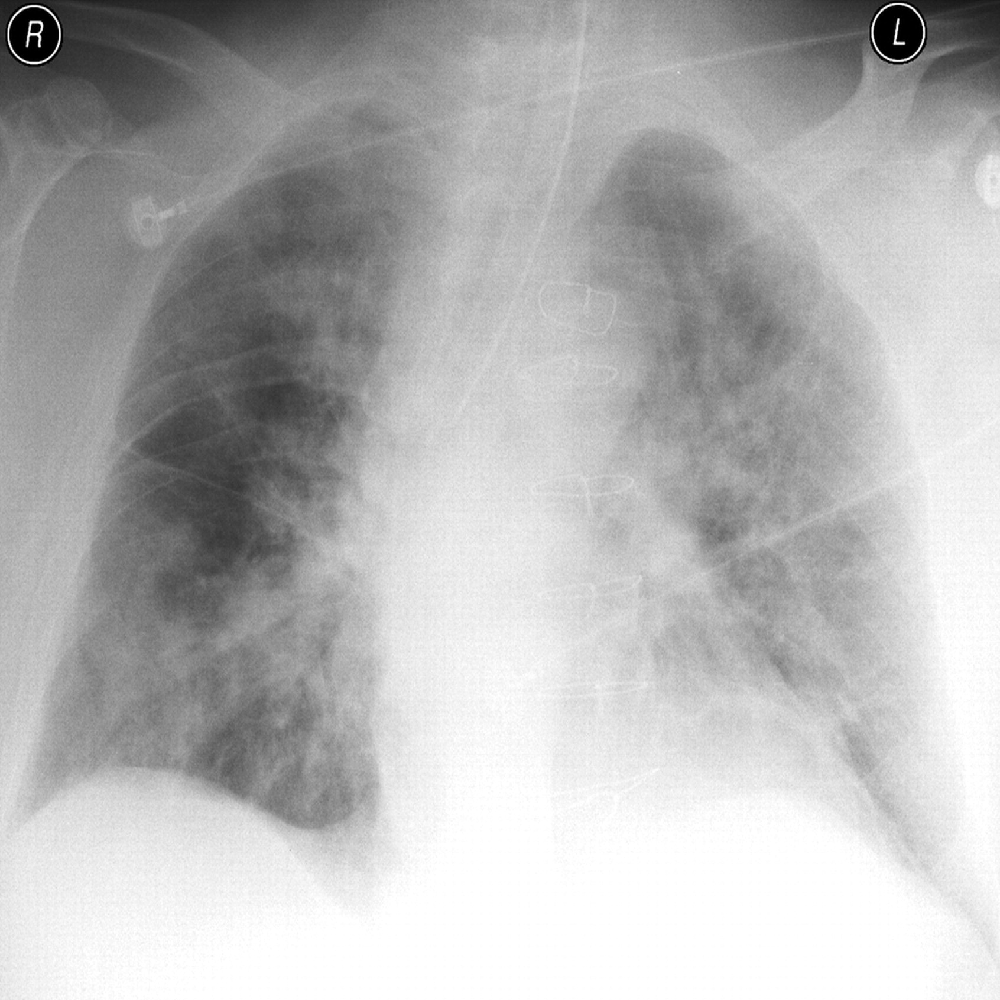

In [41]:
my_image

In [42]:
my_image = np.expand_dims(my_image, axis=0)

In [43]:
my_image.shape

(1, 1000, 1000, 3)

In [44]:
model.predict(my_image)

array([[1.]], dtype=float32)

In [45]:
train_image_gen.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

# This person has covid